In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## 1. EDA

### Data Exploration

In [4]:
# Read passengers dataset

df = pd.read_csv("canada_rent.csv")
df

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
0,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
1,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
2,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,1180,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
3,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,November 18,Non-Smoking,True,True
4,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25766,334285,Yorkton,Saskatchewan,18 Allanbrooke Dr,51.203024,-102.484782,Long Term,Apartment,920.0,Studio,1,400,/sk/yorkton/rentals/apartment/3-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
25767,334285,Yorkton,Saskatchewan,18 Allanbrooke Dr,51.203024,-102.484782,Long Term,Apartment,1450.0,3 Beds,1,810,/sk/yorkton/rentals/apartment/3-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
25768,334284,Yorkton,Saskatchewan,363 Northview Rd,51.202667,-102.485765,Long Term,Apartment,1125.0,1 Bed,1,520,/sk/yorkton/rentals/apartment/1-bedroom/pet-fr...,Unfurnished,Immediate,Non-Smoking,True,True
25769,334284,Yorkton,Saskatchewan,363 Northview Rd,51.202667,-102.485765,Long Term,Apartment,920.0,Studio,1,400,/sk/yorkton/rentals/apartment/1-bedroom/pet-fr...,Unfurnished,Immediate,Non-Smoking,True,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rentfaster_id      25771 non-null  int64  
 1   city               25771 non-null  object 
 2   province           25771 non-null  object 
 3   address            25646 non-null  object 
 4   latitude           25771 non-null  float64
 5   longitude          25771 non-null  float64
 6   lease_term         25725 non-null  object 
 7   type               25771 non-null  object 
 8   price              25771 non-null  float64
 9   beds               25639 non-null  object 
 10  baths              25637 non-null  object 
 11  sq_feet            21659 non-null  object 
 12  link               25771 non-null  object 
 13  furnishing         25771 non-null  object 
 14  availability_date  25759 non-null  object 
 15  smoking            23069 non-null  object 
 16  cats               255

In [6]:
df.describe()

,rentfaster_id,latitude,longitude,price
count,25771.000000,25771.000000,25771.000000,25771.000000
mean,471913.795274,48.903370,-100.332196,2151.624142
std,120330.335865,3.603257,17.917001,972.820941
min,820.000000,40.741802,-128.661880,0.000000
25%,415749.000000,45.418785,-114.074660,1600.000000
50%,522379.000000,50.913739,-113.513905,2045.000000
75%,563397.500000,51.093585,-79.401311,2550.000000
max,572635.000000,62.459246,-52.695472,29990.000000


In [7]:
# checking for nulls
df.isna().sum()

rentfaster_id           0
city                    0
province                0
address               125
latitude                0
longitude               0
lease_term             46
type                    0
price                   0
beds                  132
baths                 134
sq_feet              4112
link                    0
furnishing              0
availability_date      12
smoking              2702
cats                  173
dogs                  173
dtype: int64

In [8]:
# some rows have a price 0
df[df['price']==0]

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
700,417846,Calgary,Alberta,919 10 Ave SW,51.043534,-114.082819,Long Term,Apartment,0.0,2 Beds,2,961,/ab/calgary/rentals/apartment/1-bedroom/downto...,Unfurnished,August 01,Non-Smoking,True,True
4788,359534,Calgary,Alberta,515 4 Ave NE,51.055763,-114.051664,Long Term,Townhouse,0.0,2 Beds,2.5,"1,100",/ab/calgary/rentals/apartment/2-bedrooms/bridg...,Unfurnished,No Vacancy,Smoke Free Building,True,True
4789,359534,Calgary,Alberta,515 4 Ave NE,51.055763,-114.051664,Long Term,Apartment,0.0,2 Beds,2,NaN,/ab/calgary/rentals/apartment/2-bedrooms/bridg...,Unfurnished,No Vacancy,Smoke Free Building,True,True
4791,359534,Calgary,Alberta,515 4 Ave NE,51.055763,-114.051664,Long Term,Apartment,0.0,2 Beds,2,NaN,/ab/calgary/rentals/apartment/2-bedrooms/bridg...,Unfurnished,No Vacancy,Smoke Free Building,True,True
4792,359534,Calgary,Alberta,515 4 Ave NE,51.055763,-114.051664,Long Term,Apartment,0.0,2 Beds,2,NaN,/ab/calgary/rentals/apartment/2-bedrooms/bridg...,Unfurnished,No Vacancy,Smoke Free Building,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24356,536449,Montréal,Quebec,1433 Rue Towers,45.492751,-73.581495,Long Term,Apartment,0.0,Studio,1,0,/qc/montreal/rentals/apartment/1-bedroom/non-s...,Unfurnished,Immediate,Non-Smoking,False,False
24357,536449,Montréal,Quebec,1433 Rue Towers,45.492751,-73.581495,Long Term,Apartment,0.0,Studio,1,0,/qc/montreal/rentals/apartment/1-bedroom/non-s...,Unfurnished,Immediate,Non-Smoking,False,False
24358,536449,Montréal,Quebec,1433 Rue Towers,45.492751,-73.581495,Long Term,Apartment,0.0,Studio,1,0,/qc/montreal/rentals/apartment/1-bedroom/non-s...,Unfurnished,Immediate,Non-Smoking,False,False
24359,536449,Montréal,Quebec,1433 Rue Towers,45.492751,-73.581495,Long Term,Apartment,0.0,Studio,1,0,/qc/montreal/rentals/apartment/1-bedroom/non-s...,Unfurnished,Immediate,Non-Smoking,False,False


### Column Type analysis

In [10]:
df['type'].unique()

array(['Townhouse', 'Apartment', 'Main Floor', 'House', 'Basement',
       'Duplex', 'Storage', 'Condo Unit', 'Room For Rent', 'Loft',
       'Acreage', 'Office Space', 'Parking Spot', 'Vacation Home',
       'Mobile'], dtype=object)

In [11]:
dft = df.groupby('type')
dft['type'].count()

type
Acreage             11
Apartment        16377
Basement          1659
Condo Unit        2256
Duplex             497
House             1607
Loft                25
Main Floor         810
Mobile               2
Office Space        87
Parking Spot        45
Room For Rent      720
Storage             43
Townhouse         1628
Vacation Home        4
Name: type, dtype: int64

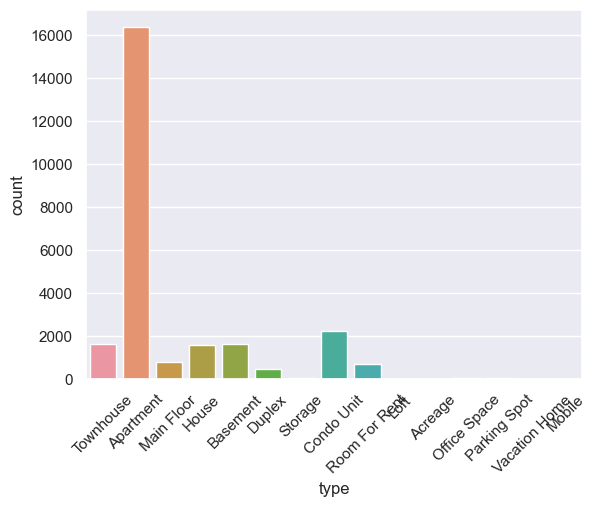

In [12]:
ax=sns.countplot(data = df, x='type')
ax.tick_params(axis='x', rotation=45)

In [13]:
df[df['type']=='Office Space'].head()

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
139,425814,Banff,Alberta,100 Jay Street,51.189545,-115.561577,Long Term,Office Space,1050.0,NaN,NaN,NaN,/ab/banff/rentals/office-space/non-smoking/425814,Unfurnished,July 01,Non-Smoking,NaN,NaN
979,405283,Calgary,Alberta,3825 34 Street Northeast,51.087445,-113.986361,Negotiable,Office Space,900.0,NaN,NaN,NaN,/ab/calgary/rentals/office-space/whitehorn/non...,Unfurnished,Immediate,Non-Smoking,NaN,NaN
1036,391308,Calgary,Alberta,3825 34 St NE,51.087445,-113.986361,Negotiable,Office Space,2200.0,NaN,NaN,NaN,/ab/calgary/rentals/office-space/whitehorn/non...,Unfurnished,Immediate,Non-Smoking,NaN,NaN
1079,391308,Calgary,Alberta,3825 34 St NE,51.087445,-113.986361,Negotiable,Office Space,2200.0,NaN,NaN,NaN,/ab/calgary/rentals/office-space/whitehorn/non...,Unfurnished,Immediate,Non-Smoking,NaN,NaN
1531,406523,Calgary,Alberta,3825 34 St NE,51.087445,-113.986361,Negotiable,Office Space,3000.0,NaN,NaN,NaN,/ab/calgary/rentals/office-space/whitehorn/non...,Unfurnished,Immediate,Non-Smoking,NaN,NaN


In [14]:
df[df['type']=='Mobile']

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
8135,487837,Edson,Alberta,851 63 Street,53.583858,-116.455695,Negotiable,Mobile,2900.0,4 Beds,2,1398.24,/ab/edson/rentals/mobile/4-bedrooms/pet-friend...,Furnished,Immediate,Non-Smoking,True,True
8771,438014,Strathmore,Alberta,NaN,51.039119,-113.283965,Negotiable,Mobile,1500.0,2 Beds,1,single wide,/ab/strathmore/rentals/mobile/2-bedrooms/non-s...,Unfurnished,Immediate,Non-Smoking,False,False


In [15]:
df[df['type']=='Parking Spot'].head()

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
850,562599,Calgary,Alberta,340 14 Avenue Southwest,51.039983,-114.070754,Short Term,Parking Spot,120.0,NaN,NaN,NaN,/ab/calgary/rentals/parking-spot/beltline/shor...,Unfurnished,Immediate,Non-Smoking,NaN,NaN
958,78435,Calgary,Alberta,339 13 Ave SW,51.040467,-114.070707,Negotiable,Parking Spot,1990.0,1 Bed,1,550,/ab/calgary/rentals/parking-spot/1-bedroom/vic...,Furnished,Immediate,Non-Smoking,NaN,NaN
1144,436371,Calgary,Alberta,1122 3 Street Southeast,51.041727,-114.055424,Negotiable,Parking Spot,275.0,NaN,NaN,NaN,/ab/calgary/rentals/parking-spot/victoria-park...,Unfurnished,Immediate,Non-Smoking,NaN,NaN
1179,436371,Calgary,Alberta,1122 3 Street Southeast,51.041727,-114.055424,Negotiable,Parking Spot,275.0,NaN,NaN,NaN,/ab/calgary/rentals/parking-spot/victoria-park...,Unfurnished,Immediate,Non-Smoking,NaN,NaN
1425,496487,Calgary,Alberta,339 13 Avenue Southwest,51.040683,-114.070900,Negotiable,Parking Spot,180.0,NaN,NaN,NaN,/ab/calgary/rentals/parking-spot/beltline/non-...,Unfurnished,Immediate,Non-Smoking,NaN,NaN


In [16]:
df[df['type']=='Room For Rent'].head()

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
58,496249,Airdrie,Alberta,NaN,51.269920,-114.042900,Long Term,Room For Rent,800.0,1 Bed,1,1750,/ab/airdrie/rentals/shared/1-bedroom/non-smoki...,Negotiable,Immediate,Non-Smoking,False,False
66,562560,Airdrie,Alberta,NaN,51.269541,-113.985951,Long Term,Room For Rent,850.0,1 Bed,1,2500,/ab/airdrie/rentals/shared/1-bedroom/furnished...,Furnished,Immediate,Non-Smoking,False,False
71,552555,Airdrie,Alberta,NaN,51.285875,-114.016541,Negotiable,Room For Rent,780.0,1 Bed,1,NaN,/ab/airdrie/rentals/shared/1-bedroom/furnished...,Furnished,Immediate,Non-Smoking,False,False
72,561775,Airdrie,Alberta,462 Bayview Manor Southwest,51.283152,-114.045917,Short Term,Room For Rent,700.0,1 Bed,1,1600,/ab/airdrie/rentals/shared/1-bedroom/short-ter...,Furnished,Immediate,Non-Smoking,False,False
73,346569,Airdrie,Alberta,NaN,51.267260,-114.011827,Negotiable,Room For Rent,850.0,1 Bed,1,NaN,/ab/airdrie/rentals/shared/1-bedroom/non-smoki...,Negotiable,Immediate,Non-Smoking,False,False


In [17]:
df[df['type']=='Storage'].head()

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
42,571557,Airdrie,Alberta,NaN,51.258837,-114.025663,Long Term,Storage,600.0,NaN,NaN,NaN,/ab/airdrie/rentals/storage/non-smoking/571557,Unfurnished,Immediate,Non-Smoking,NaN,NaN
135,568889,Aldersyde,Alberta,64057 338 Avenue East,50.746203,-113.900507,Negotiable,Storage,3000.0,NaN,NaN,NaN,/ab/aldersyde/rentals/storage/non-smoking/568889,Unfurnished,Immediate,Non-Smoking,NaN,NaN
1346,318779,Calgary,Alberta,24159 Aspen Drive Calgary Alberta,51.162839,-114.247508,Long Term,Storage,1.0,NaN,NaN,NaN,/ab/calgary/rentals/storage/bearspaw/non-smoki...,Unfurnished,Immediate,Non-Smoking,NaN,NaN
1633,550496,Calgary,Alberta,4119 46 Avenue Southwest,51.012231,-114.145292,Negotiable,Storage,500.0,NaN,NaN,NaN,/ab/calgary/rentals/storage/glamorgan/non-smok...,Unfurnished,Immediate,Non-Smoking,NaN,NaN
1706,366847,Calgary,Alberta,515 Northmount Drive Northwest,51.089932,-114.084675,Negotiable,Storage,200.0,NaN,NaN,NaN,/ab/calgary/rentals/storage/highwood/non-smoki...,Unfurnished,Immediate,Non-Smoking,NaN,NaN


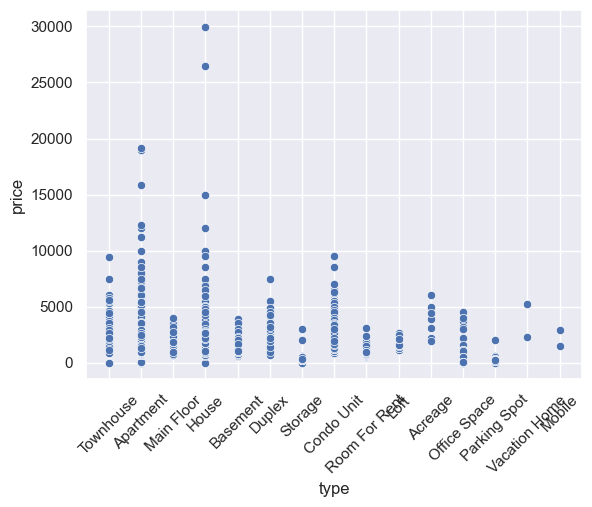

In [18]:
ax = sns.scatterplot(data = df, x = 'type', y = 'price');
ax.tick_params(axis='x', rotation=45)

### Column Province analysis

In [20]:
df['province'].unique()

array(['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia',
       'Northwest Territories', 'Ontario', 'Quebec', 'Saskatchewan'],
      dtype=object)

In [21]:
dfp = df.groupby('province')
dfp['province'].count()

province
Alberta                      13777
British Columbia              1154
Manitoba                       890
New Brunswick                   13
Newfoundland and Labrador       12
Northwest Territories           20
Nova Scotia                    281
Ontario                       6627
Quebec                        2269
Saskatchewan                   728
Name: province, dtype: int64

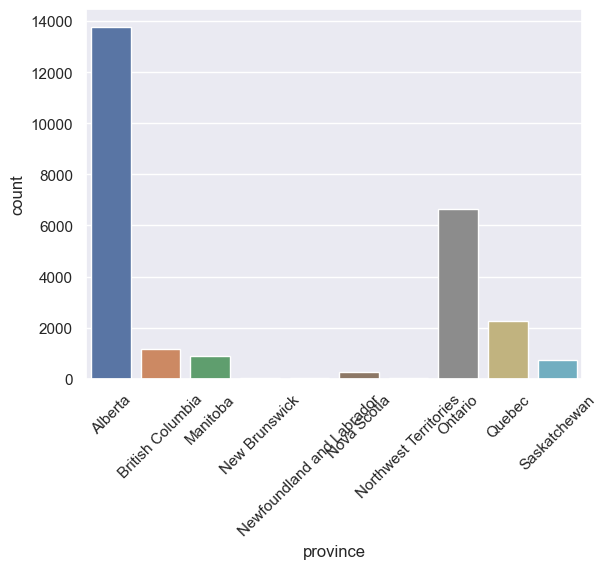

In [22]:
ax=sns.countplot(data = df, x='province')
ax.tick_params(axis='x', rotation=45)

### Column lease_term analysis

In [24]:
dfp = df.groupby('lease_term')
dfp['lease_term'].count()

lease_term
12 months        95
6 months          2
Long Term     23778
Negotiable     1498
Short Term      350
months            2
Name: lease_term, dtype: int64

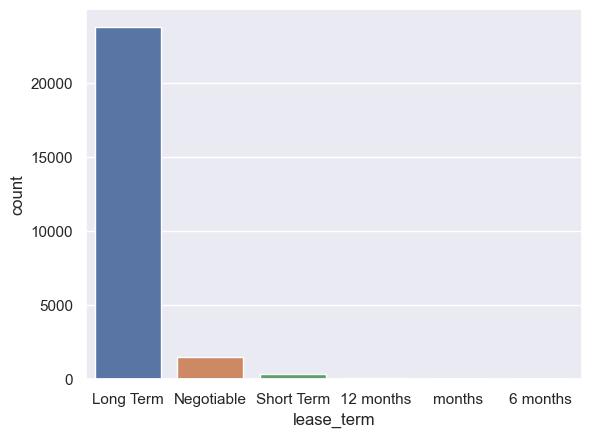

In [25]:
ax=sns.countplot(data = df, x='lease_term')
#ax.tick_params(axis='x', rotation=45)

### Column Beds analysis

In [27]:
df['beds'].unique()

array(['2 Beds', '3 Beds', 'Studio', '1 Bed', '5 Beds', '4 Beds', nan,
       '6 Beds', 'none Beds', '8 Beds', '7 Beds', '9 Beds'], dtype=object)

In [28]:
dfp = df.groupby('beds')
dfp['beds'].count()

beds
1 Bed        9400
2 Beds       9875
3 Beds       3633
4 Beds        786
5 Beds        219
6 Beds         47
7 Beds         10
8 Beds          3
9 Beds          3
Studio       1660
none Beds       3
Name: beds, dtype: int64

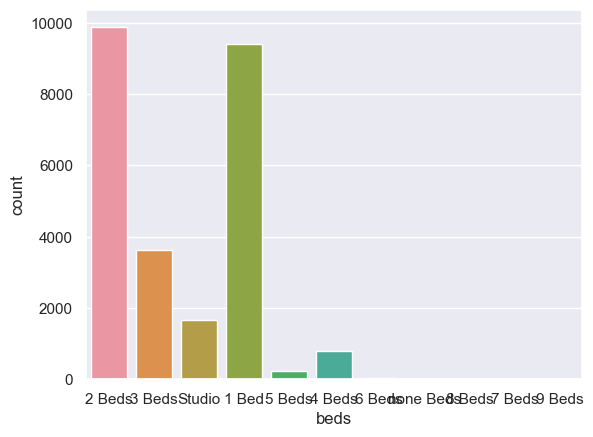

In [29]:
ax=sns.countplot(data = df, x='beds')
#ax.tick_params(axis='x', rotation=45)

### Column baths analysis

In [31]:
df['baths'].unique()

array(['2.5', '1', '2', '1.5', '3.5', nan, '4', '3', '5', 'none', '4.5',
       '7.5', '5.5', '6', '6.5', '7', '8', '0'], dtype=object)

In [32]:
dfp = df.groupby('baths')
dfp['baths'].count()

baths
0           5
1       16731
1.5       962
2        5083
2.5      1908
3         384
3.5       422
4          87
4.5        23
5           9
5.5         4
6           2
6.5         1
7           2
7.5         2
8           1
none       11
Name: baths, dtype: int64

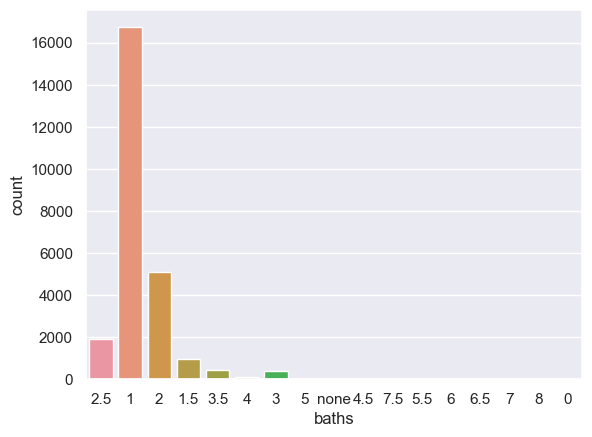

In [33]:
ax=sns.countplot(data = df, x='baths')
#ax.tick_params(axis='x', rotation=45)

# Columns Cat, Dogs and Smoking

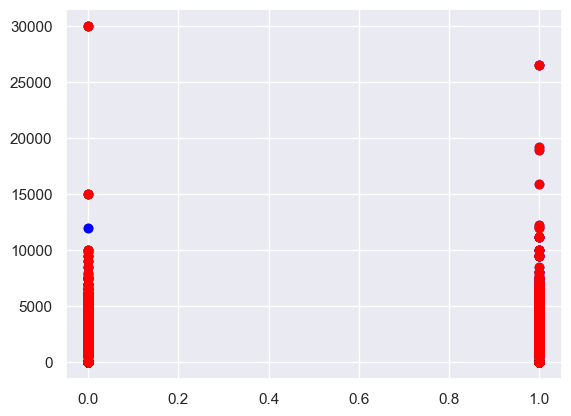

In [35]:
# Plot here
fig, ax = plt.subplots()

ax.scatter(x = 'cats', y = 'price',data = df, color = 'blue')
ax.scatter(x = 'dogs', y = 'price',data = df, color = 'red');


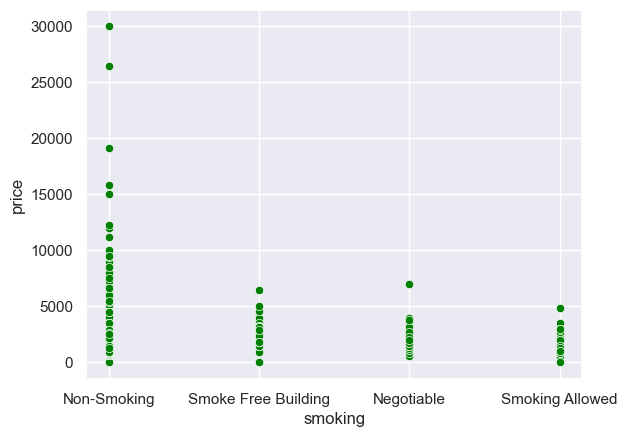

In [36]:
sns.scatterplot(data = df, x = 'smoking', y = 'price', color = 'green');

### Column furnishing analysis

In [38]:
dfp = df.groupby('furnishing')
dfp['furnishing'].count()

furnishing
Furnished                   2163
Negotiable                   416
Unfurnished                23187
Unfurnished, Negotiable        5
Name: furnishing, dtype: int64

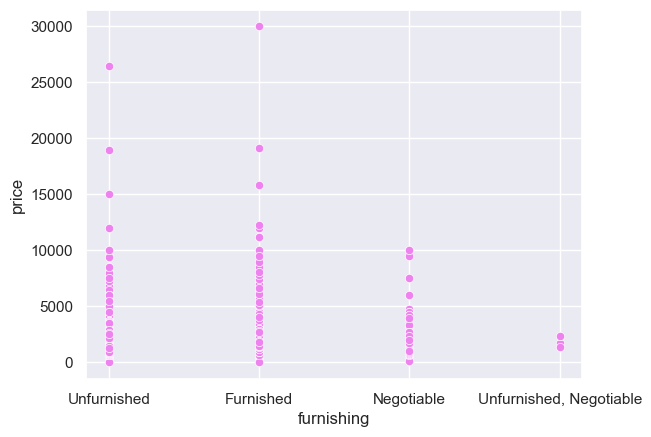

In [39]:
sns.scatterplot(data = df, x = 'furnishing', y = 'price', color = 'violet');

# 2. Data cleaning and preparation

## Remove "unncessary" rows

In [42]:
# Drop rows where the price is 0
df.drop(df.loc[df['price']==0].index, inplace=True)

In [43]:
df.describe()

,rentfaster_id,latitude,longitude,price
count,25544.000000,25544.000000,25544.000000,25544.000000
mean,472765.513702,48.931854,-100.463226,2170.744823
std,120267.610154,3.596117,17.873945,955.658569
min,820.000000,40.741802,-128.661880,1.000000
25%,417846.000000,45.424480,-114.074790,1625.000000
50%,523076.000000,50.916588,-113.517109,2050.000000
75%,563581.000000,51.096422,-79.405694,2550.000000
max,572635.000000,62.459246,-52.695472,29990.000000


In [44]:
# drop all the rows where the type of location is not for living purposes

df.drop(df.loc[df['type']=='Parking Spot'].index, inplace=True)
df.drop(df.loc[df['type']=='Office Space'].index, inplace=True)
df.drop(df.loc[df['type']=='Storage'].index, inplace=True)

In [45]:
dft = df.groupby('type')
dft['type'].count()

type
Acreage             11
Apartment        16153
Basement          1659
Condo Unit        2256
Duplex             497
House             1607
Loft                25
Main Floor         810
Mobile               2
Room For Rent      720
Townhouse         1626
Vacation Home        4
Name: type, dtype: int64

## Remove unnecessary columns

In [47]:
# removing columns that do not add significant information to calculate the price
# column type is also removed after using to remove the unnecessary rows

df = df.drop(['province','rentfaster_id','city','type','address','latitude','longitude','link','availability_date','cats','dogs'], axis = 1)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25370 entries, 0 to 25770
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lease_term  25339 non-null  object 
 1   price       25370 non-null  float64
 2   beds        25370 non-null  object 
 3   baths       25370 non-null  object 
 4   sq_feet     21463 non-null  object 
 5   furnishing  25370 non-null  object 
 6   smoking     22702 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.5+ MB


## 2. Preparing data and dealing with nulls

### Preparing Column sq_feet

In [51]:
#convert the column to float
df['sq_feet']=df['sq_feet'].str.extract('(\d+)') # removing text
df[['sq_feet']]=df[['sq_feet']].astype(float)

In [52]:
df[df['sq_feet']==0]

,lease_term,price,beds,baths,sq_feet,furnishing,smoking
160,Long Term,875.0,2 Beds,1,0.0,Unfurnished,Non-Smoking
161,Long Term,875.0,2 Beds,1,0.0,Unfurnished,Non-Smoking
162,Long Term,1035.0,1 Bed,1,0.0,Unfurnished,Non-Smoking
163,Long Term,1005.0,2 Beds,1,0.0,Unfurnished,Non-Smoking
165,Long Term,855.0,Studio,1,0.0,Unfurnished,Non-Smoking
...,...,...,...,...,...,...,...
25756,Long Term,835.0,Studio,1,0.0,Unfurnished,Non-Smoking
25757,Long Term,960.0,1 Bed,1,0.0,Unfurnished,Non-Smoking
25758,Long Term,1300.0,2 Beds,1,0.0,Unfurnished,Non-Smoking
25762,Long Term,945.0,Studio,1,0.0,Unfurnished,Non-Smoking


In [53]:
df[df['sq_feet'].isnull()]

,lease_term,price,beds,baths,sq_feet,furnishing,smoking
12,Long Term,2550.0,3 Beds,2.5,NaN,Unfurnished,Non-Smoking
13,Long Term,3150.0,5 Beds,2,NaN,Unfurnished,Non-Smoking
14,Long Term,3195.0,3 Beds,2.5,NaN,Unfurnished,Non-Smoking
32,Long Term,1250.0,1 Bed,1,NaN,Furnished,Non-Smoking
34,Long Term,2600.0,3 Beds,2.5,NaN,Unfurnished,Non-Smoking
...,...,...,...,...,...,...,...
25693,Long Term,1050.0,1 Bed,1,NaN,Unfurnished,Non-Smoking
25694,Long Term,1250.0,2 Beds,1,NaN,Unfurnished,Non-Smoking
25697,Long Term,2300.0,3 Beds,1,NaN,Unfurnished,Non-Smoking
25698,Long Term,800.0,Studio,1,NaN,Unfurnished,Non-Smoking


In [54]:
# we decided to replace the nulls  by the mean
df['sq_feet'] = df['sq_feet'].fillna(value=df['sq_feet'].mean())

In [55]:
df[df['sq_feet'].isnull()]

,lease_term,price,beds,baths,sq_feet,furnishing,smoking


In [56]:
# we assumed that rows with square feet zero was in fact incomplete information, therefore we replace them with the mean

df['sq_feet']=df['sq_feet'].mask(df['sq_feet']==0).fillna(df['sq_feet'].mean())

In [57]:
df.describe()

,price,sq_feet
count,25370.000000,25370.000000
mean,2180.131012,910.034854
std,948.271405,438.054957
min,1.000000,1.000000
25%,1640.000000,657.000000
50%,2050.000000,891.756827
75%,2550.000000,982.000000
max,29990.000000,11700.000000


### Preparing column lease_term

In [59]:
# group lease terms in 3 categories : Short Term, Long Term, Negotiable

for index,row in df.iterrows():
    if row['lease_term']=='12 months':
        df.at[index,'lease_term']='Other lease Term'
    elif row['lease_term']=='6 months':
        df.at[index,'lease_term']='Other lease Term'
    elif row['lease_term']=='months':
        df.at[index,'lease_term']='Other lease Term'
    elif row['lease_term']=='Short Term':
        df.at[index,'lease_term']='Other lease Term'
    elif row['lease_term']=='Negotiable':
        df.at[index,'lease_term']='Other lease Term'



In [60]:
dfl = df.groupby('lease_term')
dfl['lease_term'].count()

lease_term
Long Term           23460
Other lease Term     1879
Name: lease_term, dtype: int64

In [61]:
# since Long Term is the most common term, the nulls were replaced by Long Term
df['lease_term'].fillna('Long Term',inplace=True)

In [110]:
dft = df.groupby('lease_term')
dft['lease_term'].count()

lease_term
Long Term           23491
Other lease Term     1879
Name: lease_term, dtype: int64

### Preparing column beds

In [113]:
# group beds column: 1 Bed, 2 Beds, other
for index,row in df.iterrows():
    if row['beds']=='Studio' or row['beds']=='3 Beds' or row['beds']=='4 Beds' or row['beds']=='5 Beds' or row['beds']=='6 Beds' or row['beds']=='7 Beds' or row['beds']=='8 Beds' or row['beds']=='9 Beds':
        df.at[index,'beds']='other beds'

In [115]:
dfb = df.groupby('beds')
dfb['beds'].count()

beds
1 Bed         9371
2 Beds        9831
other beds    6168
Name: beds, dtype: int64

### Preparing column baths

In [118]:
#df.drop(df.loc[df['line_race']==0].index, inplace=True)
df.loc[df['baths']=='0']


,lease_term,price,beds,baths,sq_feet,furnishing,smoking
9103,Long Term,2500.0,other beds,0,1029.000000,Unfurnished,Non-Smoking
25269,Long Term,1250.0,other beds,0,891.756827,Unfurnished,Non-Smoking


In [120]:
dfbh = df.groupby('baths')
dfbh['baths'].count()

baths
0           2
1       16502
1.5       961
2        5052
2.5      1906
3         384
3.5       422
4          87
4.5        23
5           9
5.5         4
6           2
6.5         1
7           2
7.5         2
8           1
none       10
Name: baths, dtype: int64

In [122]:
# we are grouping the values of column baths in 2
# for index,row in df.iterrows():
#     if row['baths']=='1' or row['baths']=='0':
#         df.at[index,'baths']='1 or none'
#     else:
#         df.at[index,'baths']='more than 1'

for index,row in df.iterrows():
    if row['baths']!='1':
        df.at[index,'baths']='other baths'



In [124]:
dfbh = df.groupby('baths')
dfbh['baths'].count()

baths
1              16502
other baths     8868
Name: baths, dtype: int64

### Preparing column furnishing

In [127]:
for index,row in df.iterrows():
    if row['furnishing']=='Unfurnished, Negotiable':
        df.at[index,'furnishing']='Other furnishing'
    if row['furnishing']=='Negotiable':
        df.at[index,'furnishing']='Other furnishing'
    if row['furnishing']=='Furnished':
        df.at[index,'furnishing']='Other furnishing'

In [129]:
dff = df.groupby('furnishing')
dff['furnishing'].count()

furnishing
Other furnishing     2569
Unfurnished         22801
Name: furnishing, dtype: int64

### Preparing column smoking

In [132]:
dfs = df.groupby('smoking')
dfs['smoking'].count()

smoking
Negotiable                99
Non-Smoking            22076
Smoke Free Building      352
Smoking Allowed          175
Name: smoking, dtype: int64

In [134]:
for index,row in df.iterrows():
    if row['smoking']=='Smoke Free Building':
        df.at[index,'smoking']='Non-Smoking'
    elif row['smoking']=='Negotiable' or row['smoking']=='Smoking Allowed':
        df.at[index,'smoking']='Negotiable_Allowed'


In [136]:
dfs = df.groupby('smoking')
dfs['smoking'].count()

smoking
Negotiable_Allowed      274
Non-Smoking           22428
Name: smoking, dtype: int64

In [138]:
# since Non-Smoking is the most common, the nulls were replaced by Non-Smoking
df['smoking'].fillna('Non-Smoking',inplace=True)

## Summary of the the data after preparation

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25370 entries, 0 to 25770
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lease_term  25370 non-null  object 
 1   price       25370 non-null  float64
 2   beds        25370 non-null  object 
 3   baths       25370 non-null  object 
 4   sq_feet     25370 non-null  float64
 5   furnishing  25370 non-null  object 
 6   smoking     25370 non-null  object 
dtypes: float64(2), object(5)
memory usage: 2.6+ MB


In [143]:
df.describe()

,price,sq_feet
count,25370.000000,25370.000000
mean,2180.131012,910.034854
std,948.271405,438.054957
min,1.000000,1.000000
25%,1640.000000,657.000000
50%,2050.000000,891.756827
75%,2550.000000,982.000000
max,29990.000000,11700.000000


In [145]:
df.isnull().sum()

lease_term    0
price         0
beds          0
baths         0
sq_feet       0
furnishing    0
smoking       0
dtype: int64

# 3. Feature Engineering

In [148]:
df

,lease_term,price,beds,baths,sq_feet,furnishing,smoking
0,Long Term,2495.0,2 Beds,other baths,1403.0,Unfurnished,Non-Smoking
1,Long Term,2695.0,other beds,other baths,1496.0,Unfurnished,Non-Smoking
2,Long Term,2295.0,2 Beds,other baths,1180.0,Unfurnished,Non-Smoking
3,Long Term,2095.0,2 Beds,other baths,1403.0,Unfurnished,Non-Smoking
4,Long Term,2495.0,2 Beds,other baths,1403.0,Unfurnished,Non-Smoking
...,...,...,...,...,...,...,...
25766,Long Term,920.0,other beds,1,400.0,Unfurnished,Non-Smoking
25767,Long Term,1450.0,other beds,1,810.0,Unfurnished,Non-Smoking
25768,Long Term,1125.0,1 Bed,1,520.0,Unfurnished,Non-Smoking
25769,Long Term,920.0,other beds,1,400.0,Unfurnished,Non-Smoking


In [150]:
# Encoding the data

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the data
encoded_features = encoder.fit_transform(df[['lease_term', 'beds', 'baths', 'furnishing', 'smoking']])

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['lease_term', 'beds','baths' , 'furnishing', 'smoking']),index=df.index)
encoded_df

,lease_term_Other lease Term,beds_2 Beds,beds_other beds,baths_other baths,furnishing_Unfurnished,smoking_Non-Smoking
0,0.0,1.0,0.0,1.0,1.0,1.0
1,0.0,0.0,1.0,1.0,1.0,1.0
2,0.0,1.0,0.0,1.0,1.0,1.0
3,0.0,1.0,0.0,1.0,1.0,1.0
4,0.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...
25766,0.0,0.0,1.0,0.0,1.0,1.0
25767,0.0,0.0,1.0,0.0,1.0,1.0
25768,0.0,0.0,0.0,0.0,1.0,1.0
25769,0.0,0.0,1.0,0.0,1.0,1.0


In [152]:
# join the encoded features and drop the originals

df = df.drop(columns=['lease_term', 'beds', 'baths', 'furnishing', 'smoking']).join(encoded_df, how='left')
df

,price,sq_feet,lease_term_Other lease Term,beds_2 Beds,beds_other beds,baths_other baths,furnishing_Unfurnished,smoking_Non-Smoking
0,2495.0,1403.0,0.0,1.0,0.0,1.0,1.0,1.0
1,2695.0,1496.0,0.0,0.0,1.0,1.0,1.0,1.0
2,2295.0,1180.0,0.0,1.0,0.0,1.0,1.0,1.0
3,2095.0,1403.0,0.0,1.0,0.0,1.0,1.0,1.0
4,2495.0,1403.0,0.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
25766,920.0,400.0,0.0,0.0,1.0,0.0,1.0,1.0
25767,1450.0,810.0,0.0,0.0,1.0,0.0,1.0,1.0
25768,1125.0,520.0,0.0,0.0,0.0,0.0,1.0,1.0
25769,920.0,400.0,0.0,0.0,1.0,0.0,1.0,1.0


In [172]:
# Trying feature selection to use in the models

from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split

# features and target variable
X = df.drop('price', axis=1)
y = df['price']

# Splitting the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SelectKBest with f_regression choose top 5 features
selector = SelectKBest(score_func=f_regression, k=5)

# Fit and transform training data only
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = selector.get_feature_names_out(X.columns)

# View top 5 features
selected_features

array(['sq_feet', 'beds_2 Beds', 'beds_other beds', 'baths_other baths',
       'smoking_Non-Smoking'], dtype=object)

# 4. Regression models

In [174]:
# have a look at the correlation between price and the other variables

df.corr()

,price,sq_feet,lease_term_Other lease Term,beds_2 Beds,beds_other beds,baths_other baths,furnishing_Unfurnished,smoking_Non-Smoking
price,1.000000,0.424720,0.033115,0.113655,0.187859,0.440049,-0.026343,0.040835
sq_feet,0.424720,1.000000,0.121829,0.031369,0.385236,0.486964,-0.093818,-0.013287
lease_term_Other lease Term,0.033115,0.121829,1.000000,-0.027535,0.028483,0.046151,-0.420471,-0.044716
beds_2 Beds,0.113655,0.031369,-0.027535,1.000000,-0.450802,0.219329,0.065037,0.013445
beds_other beds,0.187859,0.385236,0.028483,-0.450802,1.000000,0.317385,-0.021145,-0.033235
baths_other baths,0.440049,0.486964,0.046151,0.219329,0.317385,1.000000,-0.042751,-0.005778
furnishing_Unfurnished,-0.026343,-0.093818,-0.420471,0.065037,-0.021145,-0.042751,1.000000,0.015491
smoking_Non-Smoking,0.040835,-0.013287,-0.044716,0.013445,-0.033235,-0.005778,0.015491,1.000000


## Multinear regression

In [192]:
#Separate the independent features X from the target variable y

from sklearn.model_selection import train_test_split

# Target variable
X = df.drop(['price','lease_term_Other lease Term','furnishing_Unfurnished'], axis=1)
y = df['price']

# Splitting the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((20296, 5), (5074, 5))

In [194]:
# Train de model

# Import model
from sklearn.linear_model import LinearRegression

# Create instance of model
slr_model = LinearRegression()

# training the model
slr_model.fit(X_train, y_train)

LinearRegression()

In [196]:
# Evaluate the model
# Obtain y hat values
y_pred = slr_model.predict(X_test)

In [198]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Calculate metrics for features age and bmi scaled
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

MAE, MSE, RMSE, R2

(527.2718596817899, 724523.2285591521, 851.1893024228818, 0.30958281701840196)

Mean Squared Error (MSE): 724523.23

This measures the average squared difference between the actual and predicted values. A lower MSE indicates a better fit
This suggests the predictions are somewhat off, with significant errors on average.

R-squared (R²): 0.31

This tells us how well the model explains the variance of the target variable. Ranges from 0 to 1, with 1 being a perfect fit. An R² of 0.31 indicates that approximately 30% of the variance in the target variable (price) is explained by the model. This isn't very high, suggesting the model might be missing important predictive features or needs further tuning.

## Polynomial regression

Polynomial regression with degree 2

In [203]:
from sklearn.preprocessing import PolynomialFeatures

In [205]:
X = df.drop(['price','lease_term_Other lease Term','furnishing_Unfurnished'], axis=1)
y = df['price']

# Create an instance of PolynomialFeatures
poly_converter = PolynomialFeatures(degree=2, include_bias=False)

# Fit converter to X features + transform features
poly_features = poly_converter.fit_transform(X)

In [207]:
X.shape, poly_features.shape

((25370, 5), (25370, 20))

In [209]:
# Train/test split
from sklearn.model_selection import train_test_split
X_pl_train, X_pl_test, y_pl_train, y_pl_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

# Import model
from sklearn.linear_model import LinearRegression

# Create instance of model
pl_model = LinearRegression()

# Train regression model on 
pl_model.fit(X_pl_train, y_pl_train)

LinearRegression()

In [211]:
y_pl_pred = pl_model.predict(X_pl_test)

# Obtain metrics
MAE = mean_absolute_error(y_pl_test, y_pl_pred)
MSE = mean_squared_error(y_pl_test, y_pl_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_pl_test, y_pl_pred)

MAE, MSE, RMSE,R2

(518.186552120728, 667278.0008994945, 816.8708593771078, 0.36413329554276896)

Polynomial regression with degree 3

In [214]:
# Create an instance of PolynomialFeatures -- degree 3

poly_converter = PolynomialFeatures(degree=3, include_bias=False)

# Fit converter to X features + transform features
poly_features = poly_converter.fit_transform(X)

X.shape, poly_features.shape

((25370, 5), (25370, 55))

In [216]:
# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

# Import model
from sklearn.linear_model import LinearRegression

# Create instance of model
pl_model = LinearRegression()

# Train regression model
pl_model.fit(X_train, y_train)

LinearRegression()

In [218]:
y_pl3_pred = pl_model.predict(X_pl3_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

# Obtain metrics

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

MAE, MSE, RMSE,R2 

(510.2999336351732, 611098.6172076898, 781.7279688022488, 0.41766810340155036)

Mean Squared Error (MSE):611098.62 . Lower than before, meaning better prediction fit. Even though degree 3 gives a better performance, the metrics are still similar between degree 2 and 3.

R-squared: Higher number than before, meaning the model explains more of the differences in rent prices. Indicates a better fit but it doesn't yet account for at least 50% 

## Ridge regression

In [236]:
# Import model
from sklearn.linear_model import Ridge

In [238]:
# X = df.drop(['price'], axis=1)
# # X = df.drop([['price','lease_term_Other lease Term','furnishing_Unfurnished','smoking_Non-Smoking	'], axis=1)
# y = df['price']

# Create an instance of PolynomialFeatures
poly_converter = PolynomialFeatures(degree=2, include_bias=False)

# Fit converter to X features + transform features
poly_features = poly_converter.fit_transform(X)

In [240]:
# Train/test split
# Instead of using X, we will use poly_features

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

In [242]:
# Scale the features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [244]:
scaled_X_train.shape, scaled_X_test.shape

((20296, 20), (5074, 20))

In [246]:
# Create instance of model
ridge_model = Ridge(alpha=1.0)

# Fit the model on scaled_X_train
ridge_model.fit(scaled_X_train, y_train)

Ridge()

In [248]:
# Evaluate ridge model

y_pred = ridge_model.predict(scaled_X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error

# Obtain metrics
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

MAE, MSE, RMSE, R2

(518.159017488402, 667097.0171505673, 816.7600731858574, 0.3643057597028875)

MSE: 667097.02
Lower than Linear Regression, meaning better predictions but, higher than Polynominal so predictions are less accurate than polynominal.

R²: 0.36
Explains about 36% of the variance in rent prices, better than Linear Regression. Given thet value of R2, the model could be improved.

# Ridge CV

In [260]:
# X = df.drop(['price'], axis=1)
# # X = df.drop([['price','lease_term_Other lease Term','furnishing_Unfurnished','smoking_Non-Smoking	'], axis=1)
# y = df['price']

# Create an instance of PolynomialFeatures
poly_converter = PolynomialFeatures(degree=3, include_bias=False)

# Fit converter to X features + transform features
poly_features = poly_converter.fit_transform(X)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train.shape, scaled_X_test.shape

((20296, 20), (5074, 20))

In [262]:
# Import model
from sklearn.linear_model import RidgeCV

# Create instance of model
ridgecv_model = RidgeCV((0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')

In [264]:
# Fit the model on scaled_X_train
ridgecv_model.fit(scaled_X_train, y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [266]:
ridgecv_model.alpha_

10.0

In [268]:
# Evaluate ridgecv model
y_pred = ridgecv_model.predict(scaled_X_test)

# Obtain metrics
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

MAE, MSE, RMSE, R2

(517.9558541989666, 665679.406843087, 815.8917862333749, 0.3656566377375401)

MSE: 665679.41. and R2 are very similar to Ridge.

No significant improvement.

## Lasso CV

In [270]:
X.columns

Index(['sq_feet', 'beds_2 Beds', 'beds_other beds', 'baths_other baths',
       'smoking_Non-Smoking'],
      dtype='object')

In [276]:
# X = df.drop(['price'], axis=1)
# # X = df.drop([['price','lease_term_Other lease Term','furnishing_Unfurnished','smoking_Non-Smoking	'], axis=1)
# y = df['price']

# Create an instance of PolynomialFeatures
poly_converter = PolynomialFeatures(degree=2, include_bias=False)

# Fit converter to X features + transform features
poly_features = poly_converter.fit_transform(X)


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train.shape, scaled_X_test.shape

((20296, 20), (5074, 20))

In [278]:
# Import model
from sklearn.linear_model import LassoCV

# Create instance of model
lassocv_model = LassoCV(eps=0.01,n_alphas=100,cv=10)

# Fit the model on scaled_X_train
lassocv_model.fit(scaled_X_train, y_train)

LassoCV(cv=10, eps=0.01)

In [280]:
lassocv_model.alpha_

4.512804386947463

In [282]:
# Evaluate lassocv model

y_pred = lassocv_model.predict(scaled_X_test)

# Obtain metrics

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

MAE, MSE, RMSE, R2

(519.2911857594862, 675144.3063829938, 821.6716536323946, 0.35663728677685136)

In [284]:
lassocv_model.coef_

array([ -0.        ,  -0.        , -26.09661642,   0.        ,
        29.94889089,   0.        , 116.4642289 , 210.47114572,
       237.43167825, -35.96051708,  -0.        ,   0.        ,
       107.78678147,  -0.        , -64.93283163, 106.72359163,
        -0.        ,   0.        ,   0.        ,  12.422254  ])

In [288]:
# see which features are non-zero

poly_features_names = poly_converter.get_feature_names_out(input_features=X.columns)
lasso_coefficients = lassocv_model.coef_
non_zero_mask = lasso_coefficients!=0

non_zero_features_df = pd.DataFrame({
    'Feature':poly_features_names[non_zero_mask],
    'Coefficient':lasso_coefficients[non_zero_mask]
})

non_zero_features_df

,Feature,Coefficient
0,beds_other beds,-26.096616
1,smoking_Non-Smoking,29.948891
2,sq_feet beds_2 Beds,116.464229
3,sq_feet beds_other beds,210.471146
4,sq_feet baths_other baths,237.431678
5,sq_feet smoking_Non-Smoking,-35.960517
6,beds_2 Beds baths_other baths,107.786781
7,beds_other beds^2,-64.932832
8,beds_other beds baths_other baths,106.723592
9,smoking_Non-Smoking^2,12.422254


## Let's try Lasso CV with fewer variables

In [465]:
X = df.drop(['price','lease_term_Other lease Term', 'beds_2 Beds','beds_other beds','furnishing_Unfurnished','smoking_Non-Smoking'], axis=1)
y = df['price']

In [467]:
X.columns

Index(['sq_feet', 'baths_other baths'], dtype='object')

In [469]:
# Create an instance of PolynomialFeatures
poly_converter = PolynomialFeatures(degree=2, include_bias=False)

# Fit converter to X features + transform features
poly_features = poly_converter.fit_transform(X)


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train.shape, scaled_X_test.shape

((20296, 5), (5074, 5))

In [471]:
# Import model
from sklearn.linear_model import LassoCV

# Create instance of model
lassocv_model = LassoCV(eps=0.01,n_alphas=100,cv=10)

# Fit the model on scaled_X_train
lassocv_model.fit(scaled_X_train, y_train)

LassoCV(cv=10, eps=0.01)

In [473]:
lassocv_model.alpha_

17.390220742924367

In [475]:
# Evaluate lassocv model

y_pred = lassocv_model.predict(scaled_X_test)

# Obtain metrics

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

MAE, MSE, RMSE, R2

(524.3777741471986, 680529.8443825206, 824.9423279130007, 0.35150526639723145)

In [477]:
lassocv_model.coef_

array([ 20.51048693,  81.24321353,  11.56216596, 339.10476896,
         0.        ])

In [479]:
# see which features are non-zero

poly_features_names = poly_converter.get_feature_names_out(input_features=X.columns)
lasso_coefficients = lassocv_model.coef_
non_zero_mask = lasso_coefficients!=0

non_zero_features_df = pd.DataFrame({
    'Feature':poly_features_names[non_zero_mask],
    'Coefficient':lasso_coefficients[non_zero_mask]
})

non_zero_features_df

,Feature,Coefficient
0,sq_feet,20.510487
1,baths_other baths,81.243214
2,sq_feet^2,11.562166
3,sq_feet baths_other baths,339.104769


Model with Lasso CV did not improve the metrics and the performance.

In our tests, the model that performed the better with 5 variables was polynomial degree 3.

# 4. Cross-Validation

In [492]:
X = df.drop(['price','lease_term_Other lease Term','furnishing_Unfurnished'], axis=1)
y = df['price']

In [494]:
X.columns

Index(['sq_feet', 'beds_2 Beds', 'beds_other beds', 'baths_other baths',
       'smoking_Non-Smoking'],
      dtype='object')

In [500]:
# Create an instance of PolynomialFeatures
poly_converter = PolynomialFeatures(degree=2, include_bias=False)

# Fit converter to X features + transform features
poly_features = poly_converter.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train.shape, scaled_X_test.shape

((20296, 20), (5074, 20))

In [503]:
# Import model

from sklearn.linear_model import ElasticNetCV

In [505]:
# Create instance of model
elasticcv_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1], eps=0.001, n_alphas=100, max_iter=10000)

# Fit the model on scaled_X_train
elasticcv_model.fit(scaled_X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=10000)

In [506]:
elasticcv_model.l1_ratio_

1.0

In [507]:
elasticcv_model.alpha_

1.285262876126082

In [511]:
elasticcv_model.coef_

array([  -0.        ,  -68.96094306,  -31.4583425 ,   -0.        ,
         33.80007731,    0.        ,  372.3811816 ,  478.34176128,
        195.71292059, -193.09045097,  -99.56725773,    0.        ,
        131.99091934,  -42.21453038, -207.75038712,  133.06282978,
         -0.        ,   -0.        ,    0.        ,   49.95477027])

In [513]:
# see which features are non-zero

poly_features_names = poly_converter.get_feature_names_out(input_features=X.columns)
lasso_coefficients = elasticcv_model.coef_
non_zero_mask = lasso_coefficients!=0

non_zero_features_df = pd.DataFrame({
    'Feature':poly_features_names[non_zero_mask],
    'Coefficient':lasso_coefficients[non_zero_mask]
})

non_zero_features_df

,Feature,Coefficient
0,beds_2 Beds,-68.960943
1,beds_other beds,-31.458342
2,smoking_Non-Smoking,33.800077
3,sq_feet beds_2 Beds,372.381182
4,sq_feet beds_other beds,478.341761
5,sq_feet baths_other baths,195.712921
6,sq_feet smoking_Non-Smoking,-193.090451
7,beds_2 Beds^2,-99.567258
8,beds_2 Beds baths_other baths,131.990919
9,beds_2 Beds smoking_Non-Smoking,-42.214530


In [515]:
# Evaluate lassocv model

y_pred = elasticcv_model.predict(scaled_X_test)

# Obtain metrics

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

MAE, MSE, RMSE, R2

(517.9000064086729, 668778.0045526861, 817.7884839936829, 0.3627039027284652)

## Elastic Net CV with less variables

It seems we needed to review the variables that are used, and we tried to remove more variables

In [519]:
X = df.drop(['price','lease_term_Other lease Term','furnishing_Unfurnished','smoking_Non-Smoking'], axis=1)
y = df['price']

In [521]:
# Create an instance of PolynomialFeatures
poly_converter = PolynomialFeatures(degree=2, include_bias=False)

# Fit converter to X features + transform features
poly_features = poly_converter.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

In [523]:
X_train.shape, y_train.shape

((20296, 14), (20296,))

In [525]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train.shape, scaled_X_test.shape

((20296, 14), (5074, 14))

In [527]:
# Create instance of model
elasticcv_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1], eps=0.001, n_alphas=100, max_iter=10000)

# Scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Fit the model on scaled_X_train
elasticcv_model.fit(scaled_X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=10000)

In [528]:
elasticcv_model.l1_ratio_

0.95

In [529]:
elasticcv_model.alpha_

0.5461714118688882

In [533]:
elasticcv_model.coef_

array([-55.85163311, -21.80929008, -54.64020611,   3.92289681,
        18.04462589, 160.88661425, 226.95280661, 208.7141214 ,
       -22.26995759,   0.        , 118.93736219, -54.78488037,
       128.15820223,   3.56480716])

In [537]:
# see which features are non-zero

poly_features_names = poly_converter.get_feature_names_out(input_features=X.columns)
elasticcv_coefficients = elasticcv_model.coef_
non_zero_mask = elasticcv_coefficients!=0

non_zero_features_df = pd.DataFrame({
    'Feature':poly_features_names[non_zero_mask],
    'Coefficient':elasticcv_coefficients[non_zero_mask]
})

non_zero_features_df

,Feature,Coefficient
0,sq_feet,-55.851633
1,beds_2 Beds,-21.809290
2,beds_other beds,-54.640206
3,baths_other baths,3.922897
4,sq_feet^2,18.044626
5,sq_feet beds_2 Beds,160.886614
6,sq_feet beds_other beds,226.952807
7,sq_feet baths_other baths,208.714121
8,beds_2 Beds^2,-22.269958
9,beds_2 Beds baths_other baths,118.937362


In [539]:
# Evaluate lassocv model

y_pred = elasticcv_model.predict(scaled_X_test)

# Obtain metrics

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

MAE, MSE, RMSE, R2

(519.7372191182635, 663954.3736539481, 814.83395465208, 0.36730046709738495)

# 6. The best model (so far)

As we'seen, we got a better R2 with the polynomial regression, degree 3. However, in this case we would have 55 features which is not idel because it is very difficult to explain.

Lasso CV and Ridge CV had similar performances. When we used Lasso CV with only 2 varibles we obtained similar metrics but only 3 features:
```
Feature	                   Coefficient
sq_feet	                     20.510487
baths_other baths	        81.243214
sq_feet^2	                11.562166
sq_feet baths_other baths	339.104769
```
Which lead us to think that we could review the variables that we chose at the beginning and reviewing the models.

In conclusion, we are going to use the Lasso CV with 3 features as our final model

# 7. Trying the final model

To be continued.
After calculating the predictions, we have concluded we do need to review our models